In [1]:
import pandas as pd

df = pd.read_parquet("training_samples.parquet")
df.rename(columns={"label_name": "label"}, inplace=True)
df

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


In [2]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")


2025-01-13 12:32:22.764 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, filepath_col="filepath", label_col="label")

2025-01-13 12:32:22.768 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 12:32:22.769 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 12:32:23.196 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 12:32:23.327 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


2025-01-13 12:32:23.340 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-13 12:32:35.585 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0014454397605732083


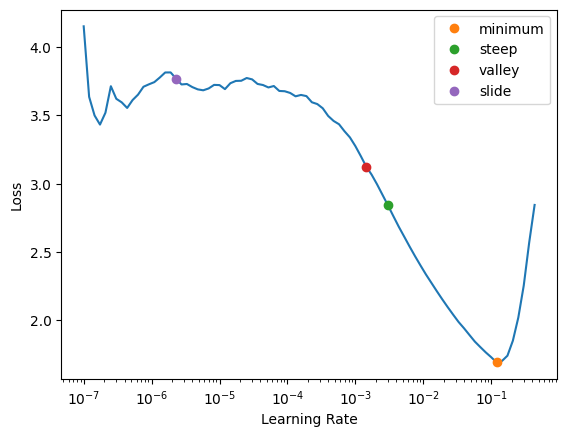

In [5]:
al.lr_find()

2025-01-13 12:32:35.854 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.747397,3.290950,0.150000,00:01


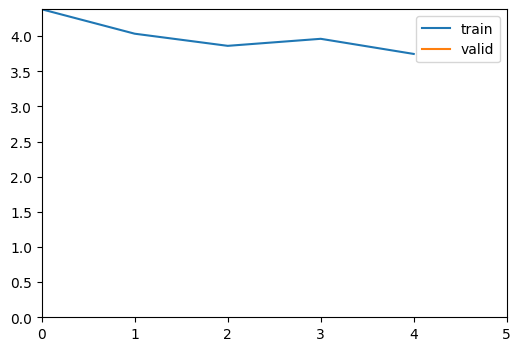

epoch,train_loss,valid_loss,accuracy,time
0,2.605477,1.991888,0.200000,00:01
1,2.258672,1.230619,0.600000,00:01
2,1.811291,1.040657,0.650000,00:01


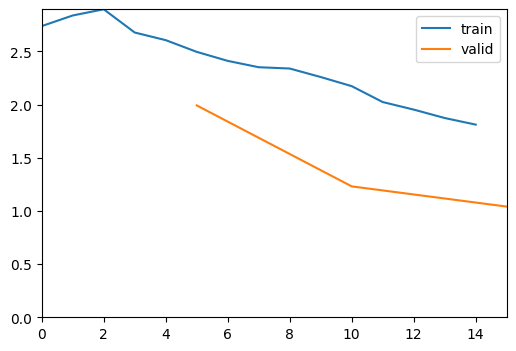

In [6]:
al.train(epochs=3, lr=1e-3)

In [7]:
df = pd.read_parquet("evaluation_samples.parquet").drop(columns=["label_name"])
filepaths = df["filepath"].tolist()

filepaths

['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00003.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/i

In [8]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

2025-01-13 12:32:41.213 | INFO     | active_vision.core:predict:77 - Running inference on 3925 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.145358
1,data/imagenette/2/00001.jpg,cassette player,0.181934
2,data/imagenette/2/00002.jpg,cassette player,0.225502
3,data/imagenette/2/00003.jpg,cassette player,0.117145
4,data/imagenette/2/00004.jpg,cassette player,0.140729
...,...,...,...
3920,data/imagenette/5/03920.jpg,French horn,0.133645
3921,data/imagenette/5/03921.jpg,French horn,0.180064
3922,data/imagenette/5/03922.jpg,French horn,0.185318
3923,data/imagenette/5/03923.jpg,French horn,0.171855


In [9]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=10)
uncertain_df

,filepath,pred_label,pred_conf
2321,data/imagenette/7/02321.jpg,cassette player,0.107783
1951,data/imagenette/7/01951.jpg,gas pump,0.107871
1968,data/imagenette/7/01968.jpg,church,0.108220
3171,data/imagenette/6/03171.jpg,gas pump,0.108248
3635,data/imagenette/5/03635.jpg,French horn,0.108421
2858,data/imagenette/8/02858.jpg,golf ball,0.109208
937,data/imagenette/3/00937.jpg,English springer,0.109317
1926,data/imagenette/9/01926.jpg,cassette player,0.109548
3836,data/imagenette/5/03836.jpg,tench,0.109727
2051,data/imagenette/7/02051.jpg,English springer,0.109870


In [10]:
al.label(uncertain_df)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [11]:
labeled_df = pd.read_parquet("labeled.parquet")

labeled_df


,filepath,label
1,data/imagenette/5/03546.jpg,French horn
2,data/imagenette/2/00222.jpg,cassette player
3,data/imagenette/7/02080.jpg,gas pump
4,data/imagenette/3/01096.jpg,cassette player
5,data/imagenette/6/03167.jpg,garbage truck
6,data/imagenette/9/01631.jpg,parachute
7,data/imagenette/3/00804.jpg,chain saw
8,data/imagenette/1/02420.jpg,English springer
9,data/imagenette/9/01673.jpg,English springer
10,data/imagenette/5/03638.jpg,French horn


In [12]:
al.add_to_train_set(labeled_df)

2025-01-13 12:32:46.438 | INFO     | active_vision.core:add_to_train_set:268 - Adding 10 samples to training set
2025-01-13 12:32:46.439 | INFO     | active_vision.core:add_to_train_set:283 - All new samples added to training set
2025-01-13 12:32:46.440 | INFO     | active_vision.core:add_to_train_set:284 - Training set now has 110 samples
